In [1]:
!pip install mxnet-cu100

#MXNet (From Scratch)

In [0]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

ctx = mx.gpu()

In [0]:
def transform(data, label):
    return data.reshape((784)).astype('float32')/255.0

train_mnist = gluon.data.vision.MNIST(train = True, transform = transform)
test_mnist = gluon.data.vision.MNIST(train = False, transform = transform)

In [4]:
image = train_mnist[1]
print(image.shape)

(784,)


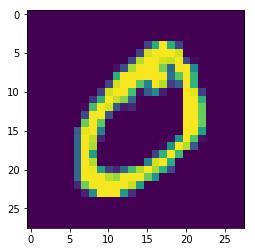

In [5]:
plt.imshow(image.reshape((28, 28)).asnumpy())
plt.show()

##Creating data loader for training and testing

In [0]:
batch_size = 64
training_data = gluon.data.DataLoader(train_mnist, batch_size = batch_size, shuffle = True)

##Building the GAN model

The GAN we are gonna build is a very toy model, so the final results are not gonna be earth shattering.

In [0]:
# ===================== Discriminator Parameters ===========================
dw1 = nd.random.normal(0, 1, (784, 128), ctx = ctx) * 0.001
db1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

dw2 = nd.random.normal(0, 1, (128, 10), ctx = ctx) * 0.001
db2 = nd.random.normal(0, 1, 10, ctx = ctx) * 0.001
# ==========================================================================

# ======================= Generator Parameters =============================
gw1 = nd.random.normal(0, 1, (100, 128), ctx = ctx) * 0.001
gb1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

gw2 = nd.random.normal(0, 1, (128, 784), ctx = ctx) * 0.001
gb2 = nd.random.normal(0, 1, 784, ctx = ctx) * 0.001
# ==========================================================================

def discriminator(x):
    layer1 = nd.relu(nd.dot(x, dw1) + db1)
    predicted = nd.sigmoid(nd.dot(layer1, dw2) + db2)
    return predicted

def generator(z):
    layer1 = nd.relu(nd.dot(z, gw1) + gb1)
    generated = nd.sigmoid(nd.dot(layer1, gw2) + gb2)
    return generated

dparams = [dw1, db1, dw2, db2]
gparams = [gw1, gb1, gw2, gb2]

# as we this is an scratch implementation, so we are gonna implement the optimizer from scratch too

dsqrs = [] # for adam optimizer
dvs = [] # for adam optimizer

gsqrs = [] # for adam optimizer
gvs = [] # for adam optimizer

for param in dparams:
    param.attach_grad()
    dsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    dvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    
for param in gparams:
    param.attach_grad()
    gsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    gvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability

In [0]:
def dloss(generated, true):
    return -nd.mean(nd.log(discriminator(true) + 1e-8) + nd.log(1 - discriminator(generated) + 1e-8))

def gloss(generated):
    return -nd.mean(nd.log(discriminator(generated) + 1e-8))

In [0]:
def adam(t, params, vs, sqrs, lr = 0.001):
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8

    for param, v, sqr in zip(params, vs, sqrs):
        grad = param.grad / batch_size

        v[:] = beta1 * v + (1. - beta1) * grad
        sqr[:] = beta2 * sqr + (1. - beta2) * nd.square(grad + 1e-8)

        v_bias_corr = v / (1. - beta1 ** t)
        sqr_bias_corr = sqr / (1. - beta2 ** t)

        update = lr * v_bias_corr / (nd.sqrt(sqr_bias_corr + 1e-8) + eps)
        param[:] = param - update
        
def sgd(params, lr = 0.001):
    for param in params:
        param[:] = param - lr * param.grad

Epoch: 0 | Generator Loss: 0.85011 | Discirminator Loss: 1.30313


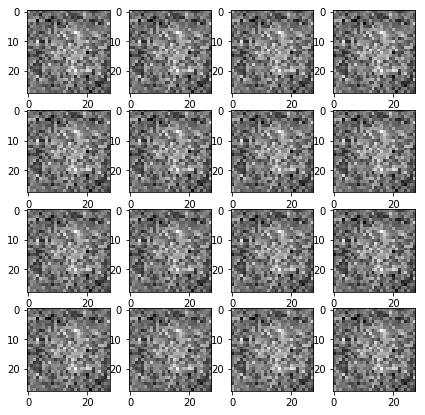

Epoch: 1 | Generator Loss: 3.67386 | Discirminator Loss: 0.40083


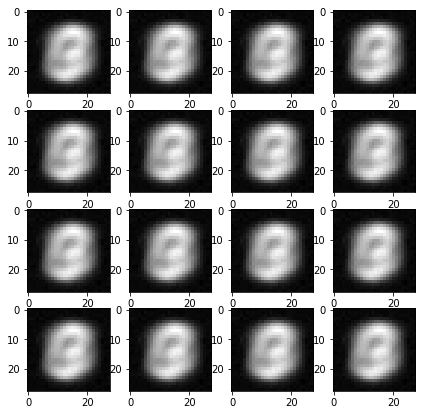

Epoch: 2 | Generator Loss: 5.07832 | Discirminator Loss: 0.03003


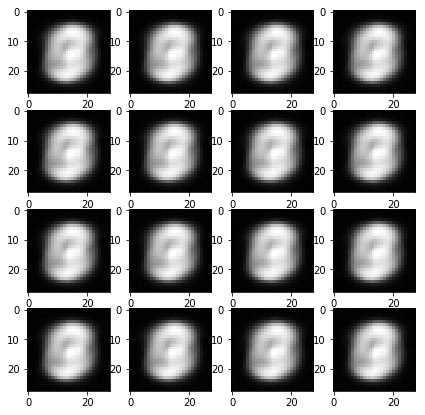

Epoch: 3 | Generator Loss: 1.70415 | Discirminator Loss: 0.63776


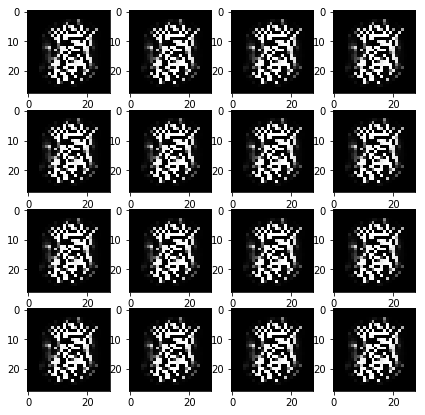

Epoch: 4 | Generator Loss: 2.43065 | Discirminator Loss: 0.35917


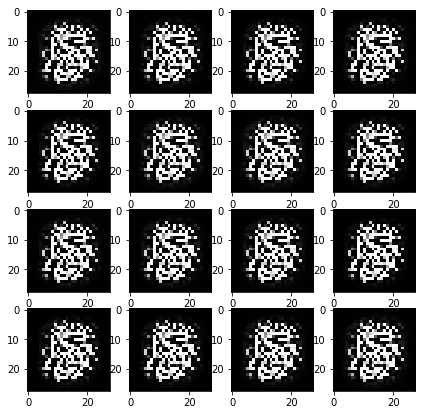

Epoch: 5 | Generator Loss: 3.43179 | Discirminator Loss: 0.11596


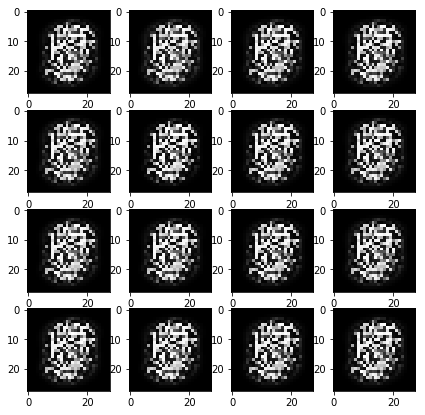

Epoch: 6 | Generator Loss: 2.12317 | Discirminator Loss: 0.40267


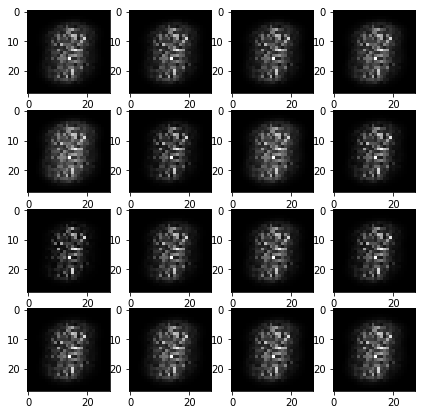

Epoch: 7 | Generator Loss: 2.43280 | Discirminator Loss: 0.35159


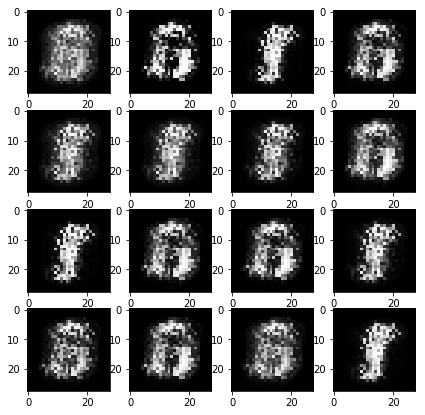

Epoch: 8 | Generator Loss: 2.95476 | Discirminator Loss: 0.23059


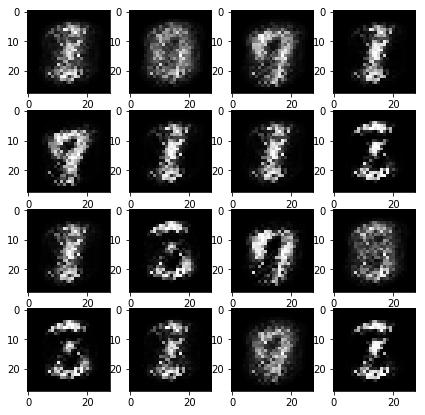

Epoch: 9 | Generator Loss: 2.47378 | Discirminator Loss: 0.36307


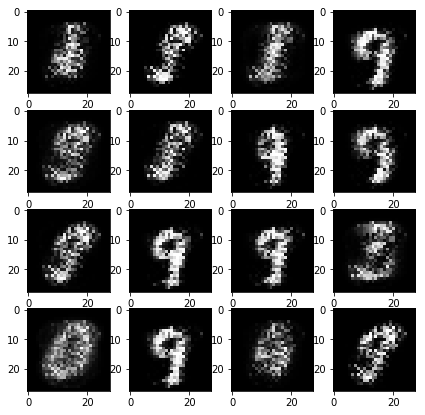

Epoch: 10 | Generator Loss: 2.60680 | Discirminator Loss: 0.39026


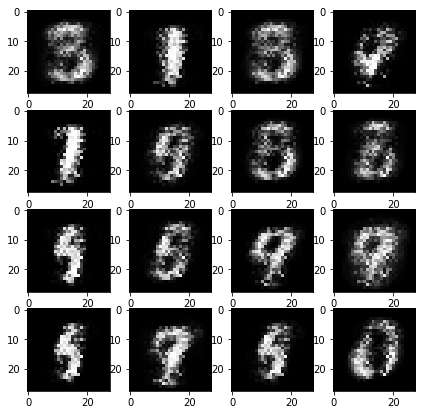

Epoch: 11 | Generator Loss: 2.60545 | Discirminator Loss: 0.41951


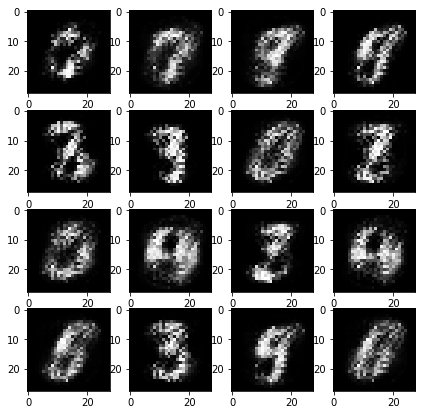

Epoch: 12 | Generator Loss: 2.90067 | Discirminator Loss: 0.44534


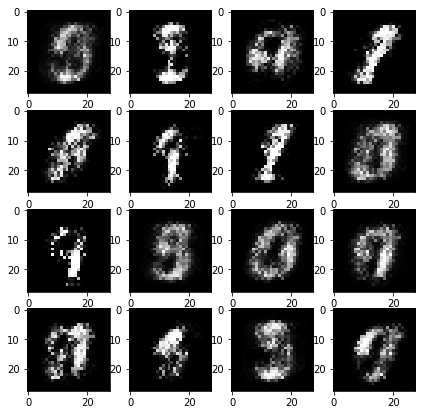

Epoch: 13 | Generator Loss: 2.85229 | Discirminator Loss: 0.54914


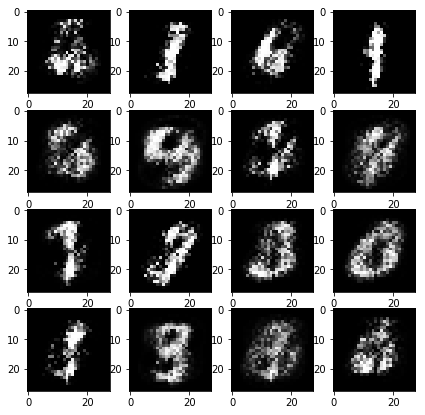

Epoch: 14 | Generator Loss: 2.57896 | Discirminator Loss: 0.63820


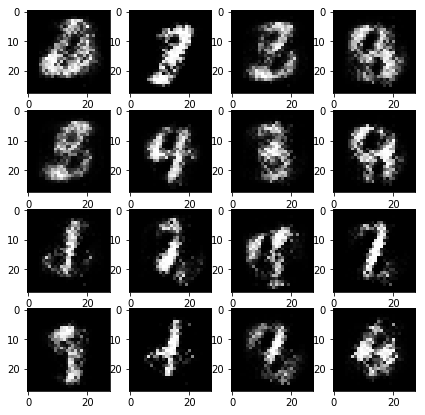

Epoch: 15 | Generator Loss: 2.45222 | Discirminator Loss: 0.84438


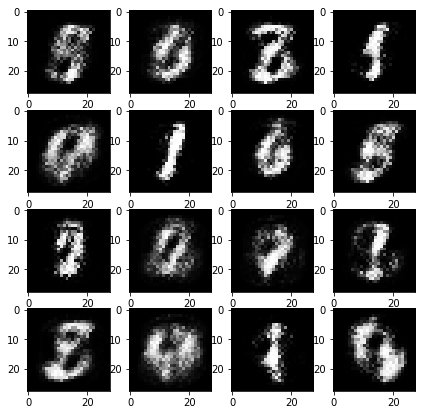

Epoch: 16 | Generator Loss: 2.02696 | Discirminator Loss: 0.86813


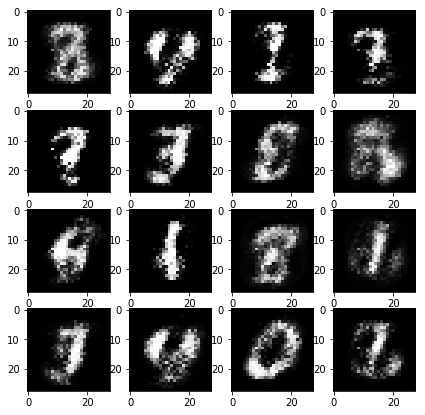

Epoch: 17 | Generator Loss: 2.18184 | Discirminator Loss: 0.74052


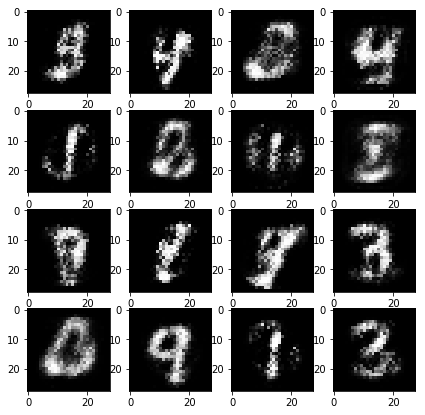

Epoch: 18 | Generator Loss: 2.12263 | Discirminator Loss: 0.82256


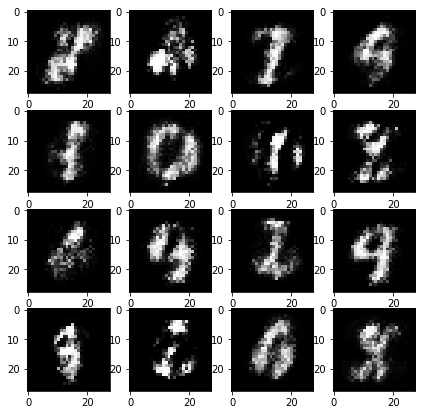

Epoch: 19 | Generator Loss: 2.08795 | Discirminator Loss: 0.86137


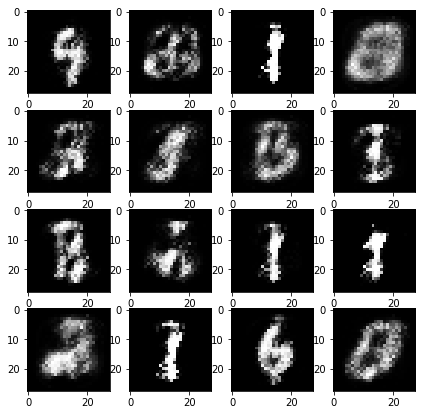

Epoch: 20 | Generator Loss: 2.29901 | Discirminator Loss: 0.79442


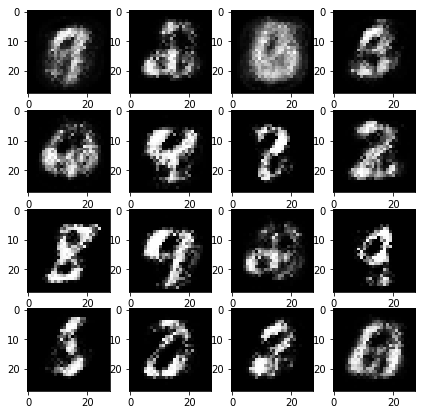

Epoch: 21 | Generator Loss: 2.05813 | Discirminator Loss: 0.86400


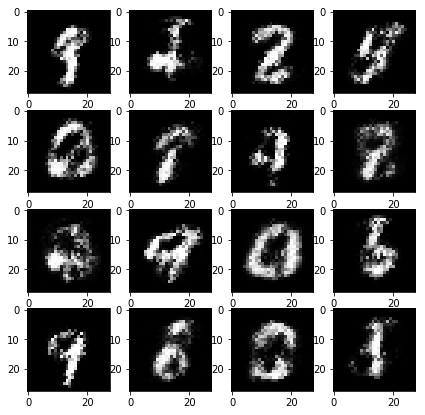

Epoch: 22 | Generator Loss: 2.08644 | Discirminator Loss: 0.84898


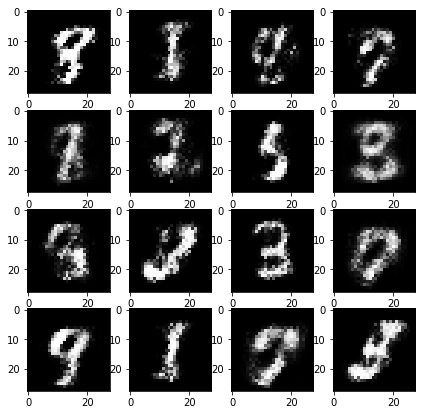

Epoch: 23 | Generator Loss: 1.99571 | Discirminator Loss: 0.96354


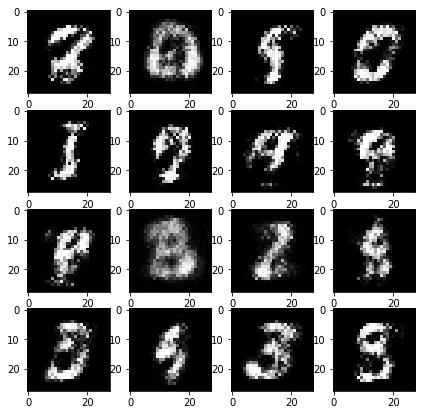

Epoch: 24 | Generator Loss: 2.01573 | Discirminator Loss: 0.91304


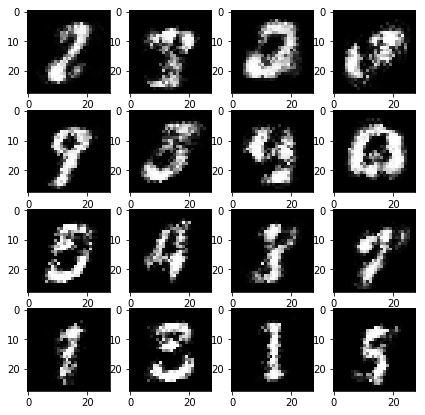

Epoch: 25 | Generator Loss: 1.91396 | Discirminator Loss: 0.95986


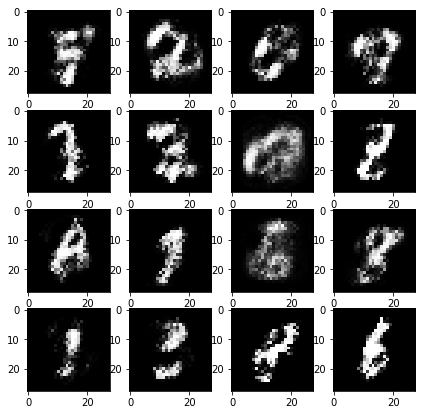

Epoch: 26 | Generator Loss: 1.84317 | Discirminator Loss: 0.97116


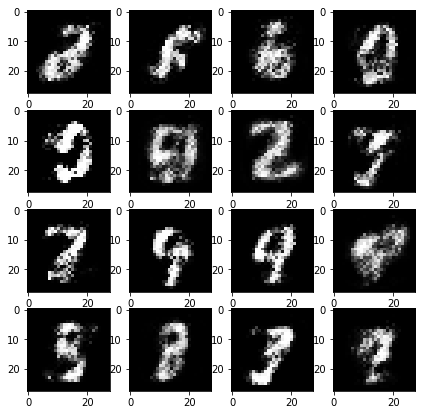

Epoch: 27 | Generator Loss: 1.80792 | Discirminator Loss: 0.96048


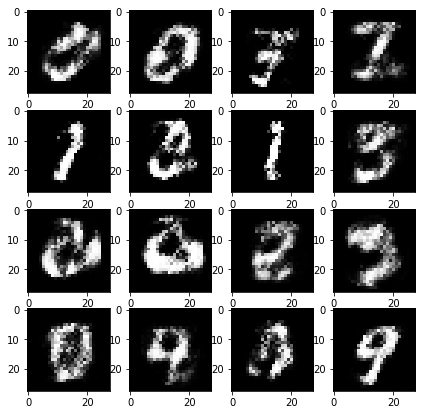

Epoch: 28 | Generator Loss: 1.71231 | Discirminator Loss: 0.96893


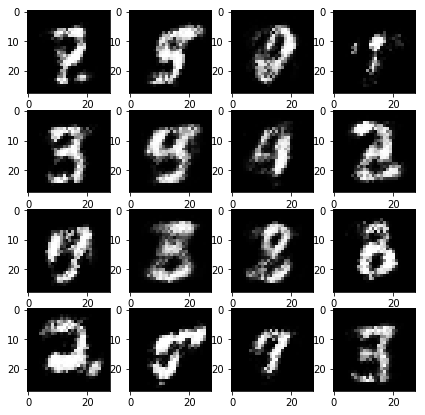

Epoch: 29 | Generator Loss: 1.64516 | Discirminator Loss: 0.95576


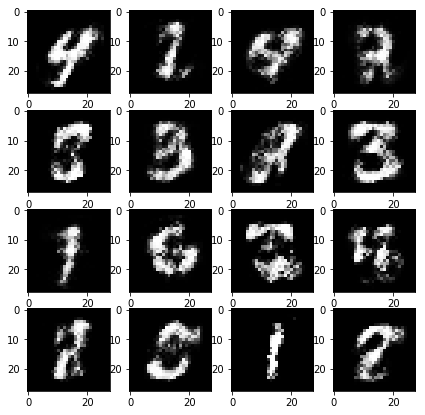

Epoch: 30 | Generator Loss: 1.63557 | Discirminator Loss: 0.98412


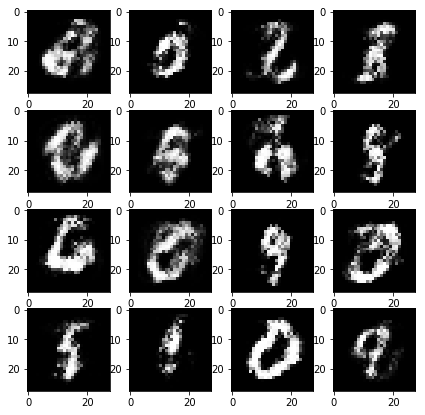

Epoch: 31 | Generator Loss: 1.59016 | Discirminator Loss: 0.99484


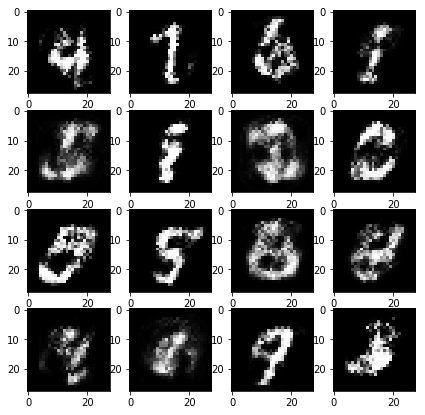

Epoch: 32 | Generator Loss: 1.66954 | Discirminator Loss: 0.94565


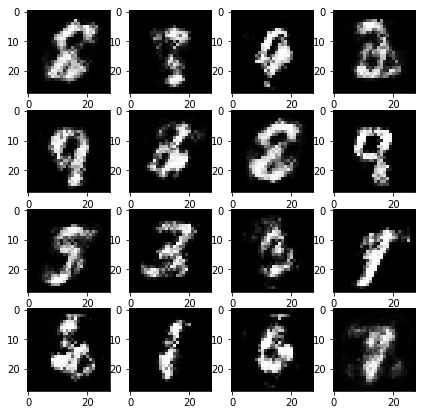

Epoch: 33 | Generator Loss: 1.59265 | Discirminator Loss: 0.96112


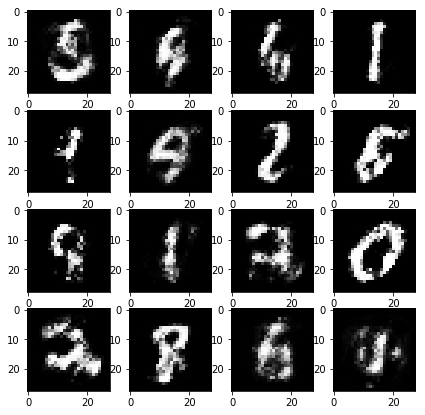

Epoch: 34 | Generator Loss: 1.57006 | Discirminator Loss: 0.97976


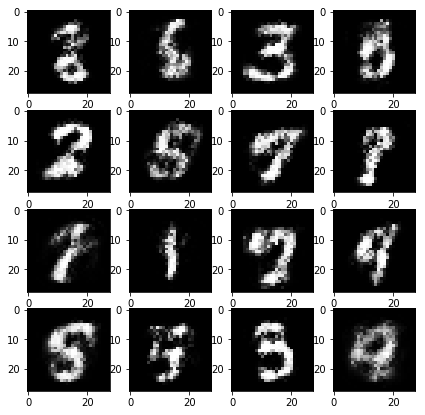

Epoch: 35 | Generator Loss: 1.54723 | Discirminator Loss: 1.00457


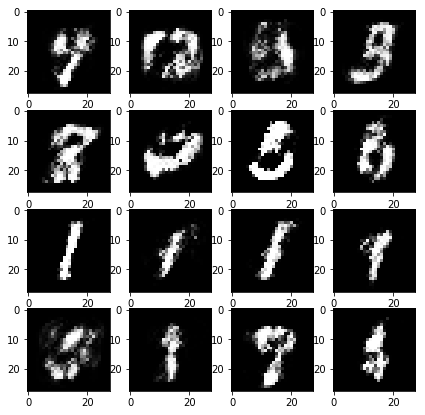

Epoch: 36 | Generator Loss: 1.47118 | Discirminator Loss: 1.02591


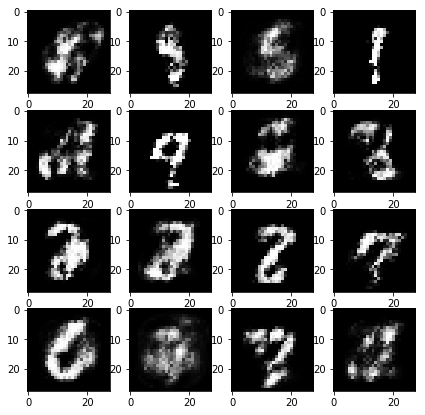

Epoch: 37 | Generator Loss: 1.47681 | Discirminator Loss: 0.97487


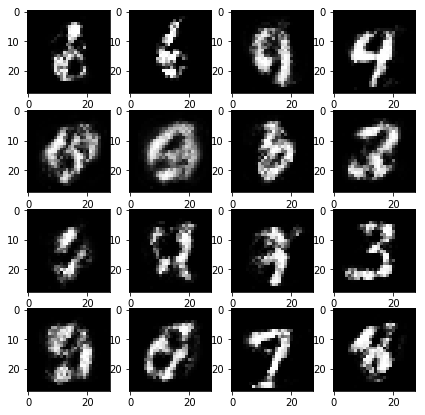

Epoch: 38 | Generator Loss: 1.44784 | Discirminator Loss: 0.95753


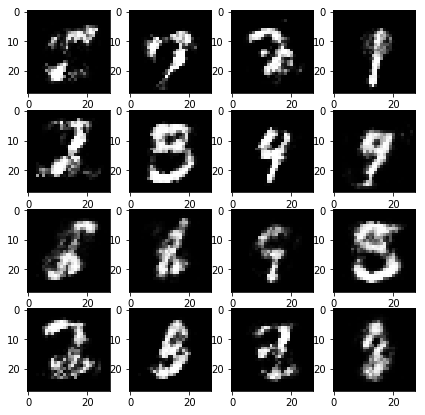

Epoch: 39 | Generator Loss: 1.43816 | Discirminator Loss: 0.94299


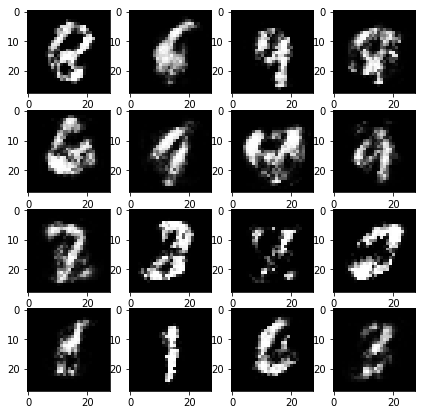

Epoch: 40 | Generator Loss: 1.44505 | Discirminator Loss: 0.95993


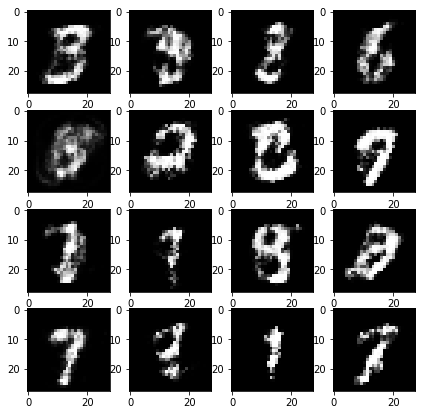

Epoch: 41 | Generator Loss: 1.42502 | Discirminator Loss: 0.96635


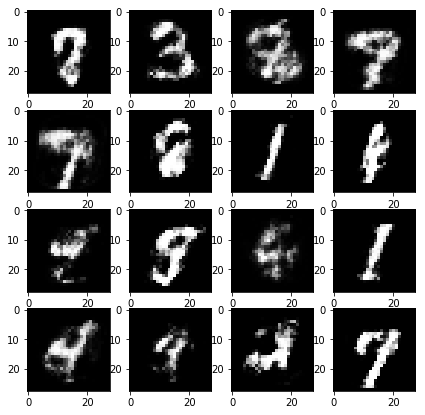

Epoch: 42 | Generator Loss: 1.40139 | Discirminator Loss: 0.98002


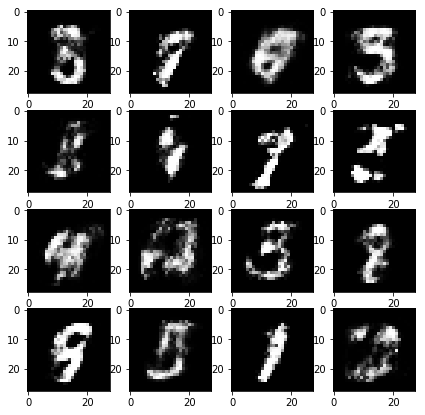

Epoch: 43 | Generator Loss: 1.40165 | Discirminator Loss: 1.00330


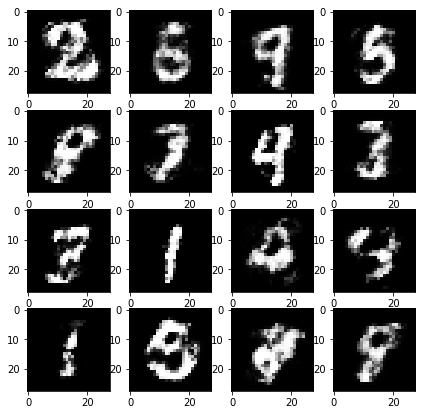

Epoch: 44 | Generator Loss: 1.39830 | Discirminator Loss: 0.98522


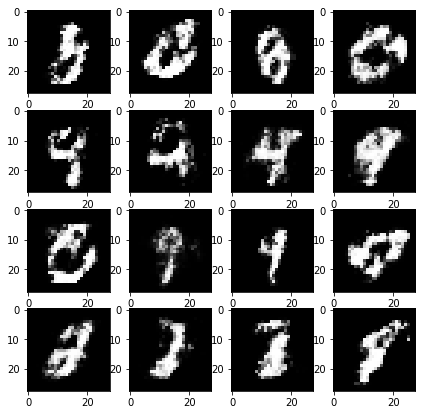

Epoch: 45 | Generator Loss: 1.40919 | Discirminator Loss: 0.97139


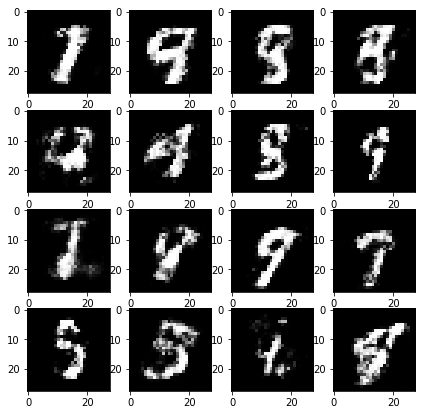

Epoch: 46 | Generator Loss: 1.44012 | Discirminator Loss: 0.96865


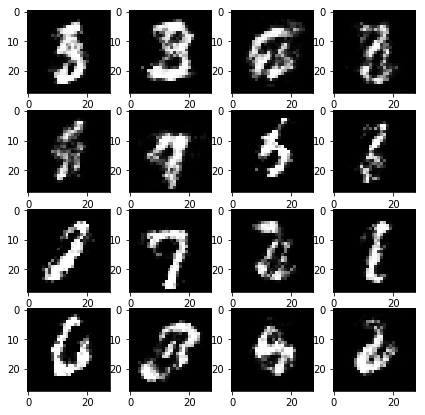

Epoch: 47 | Generator Loss: 1.42369 | Discirminator Loss: 0.98142


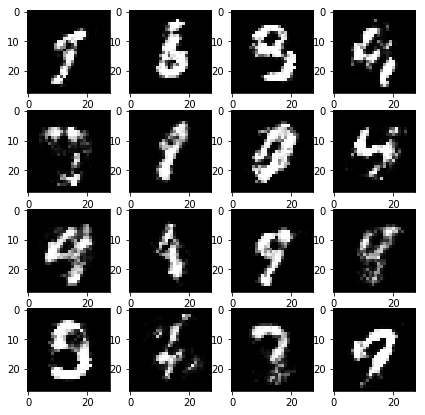

Epoch: 48 | Generator Loss: 1.45544 | Discirminator Loss: 0.95404


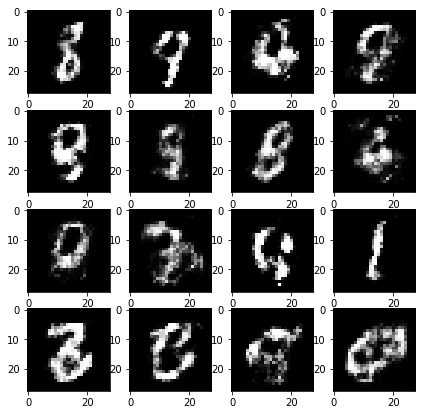

Epoch: 49 | Generator Loss: 1.44115 | Discirminator Loss: 0.95445


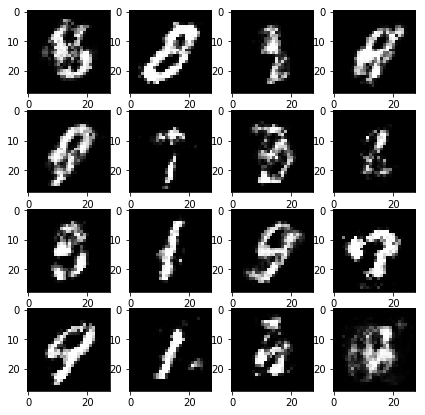

Epoch: 50 | Generator Loss: 1.50770 | Discirminator Loss: 0.95398


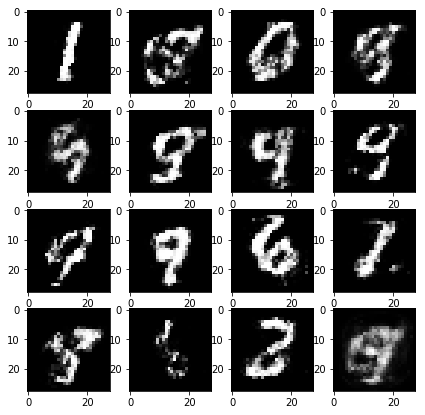

Epoch: 51 | Generator Loss: 1.51571 | Discirminator Loss: 0.95534


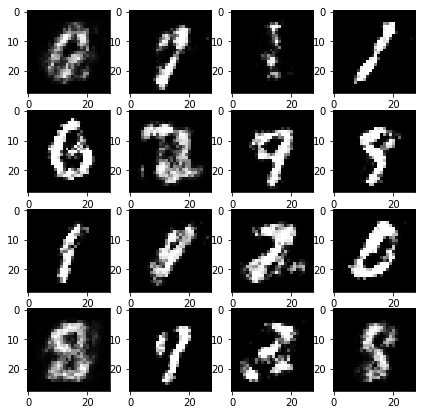

Epoch: 52 | Generator Loss: 1.47635 | Discirminator Loss: 0.95026


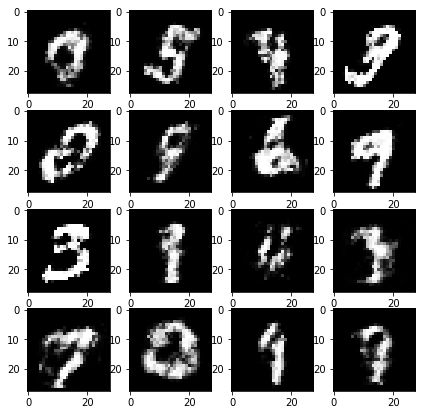

Epoch: 53 | Generator Loss: 1.46332 | Discirminator Loss: 0.94343


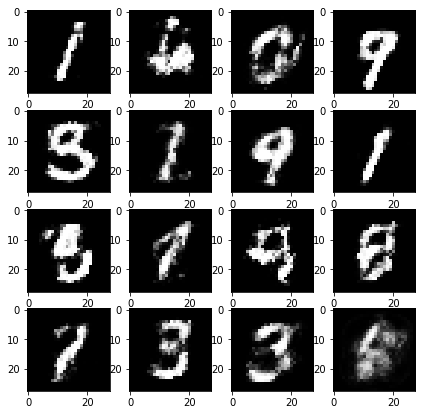

Epoch: 54 | Generator Loss: 1.48365 | Discirminator Loss: 0.93263


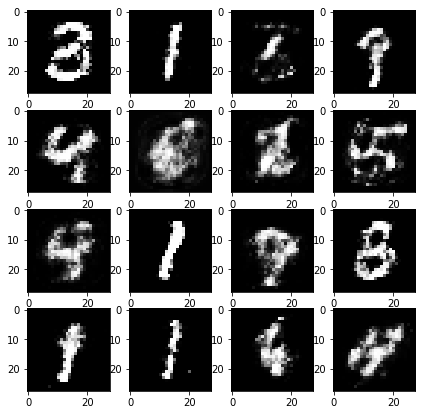

Epoch: 55 | Generator Loss: 1.50979 | Discirminator Loss: 0.93300


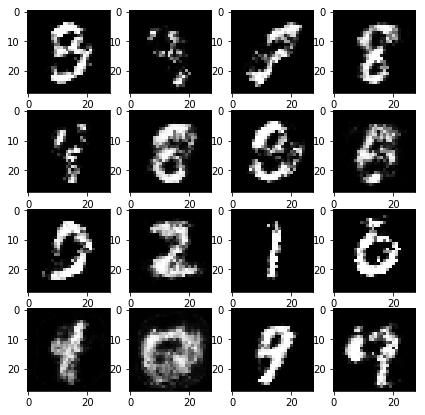

Epoch: 56 | Generator Loss: 1.51805 | Discirminator Loss: 0.94466


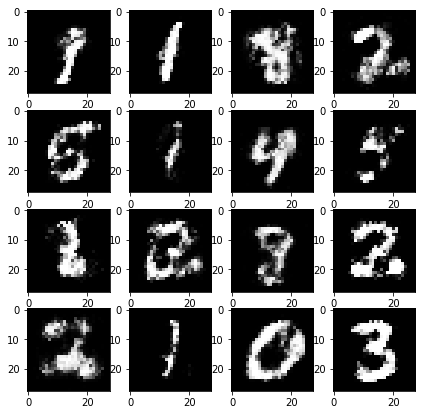

Epoch: 57 | Generator Loss: 1.46223 | Discirminator Loss: 0.96813


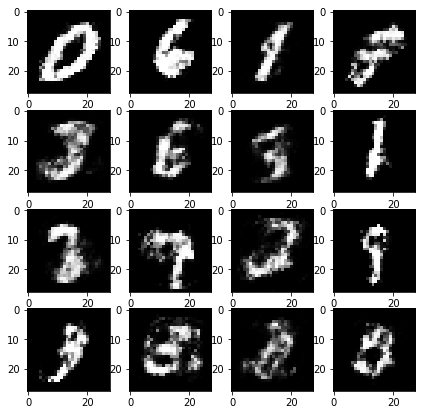

Epoch: 58 | Generator Loss: 1.44493 | Discirminator Loss: 0.96483


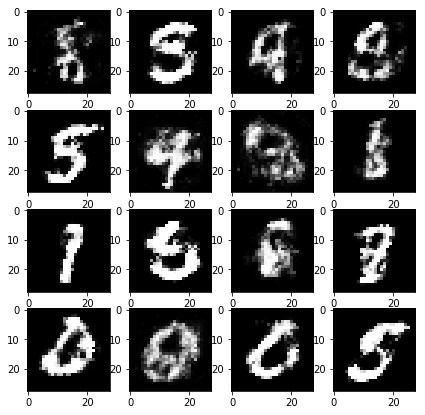

Epoch: 59 | Generator Loss: 1.46610 | Discirminator Loss: 0.94737


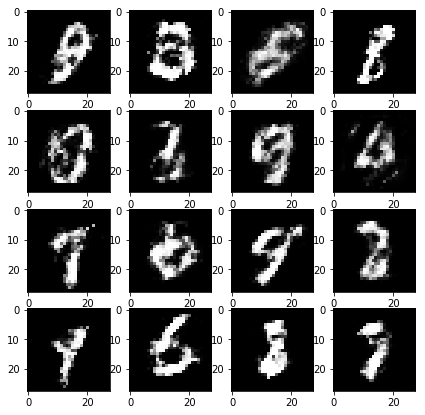

Epoch: 60 | Generator Loss: 1.49057 | Discirminator Loss: 0.95767


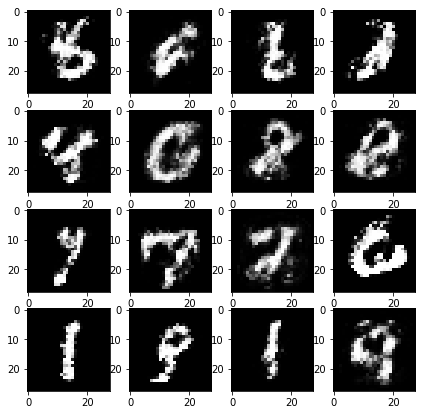

Epoch: 61 | Generator Loss: 1.47780 | Discirminator Loss: 0.96122


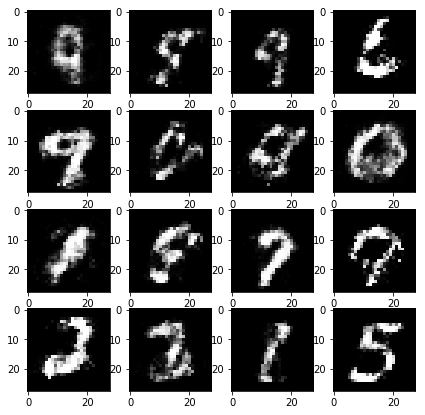

Epoch: 62 | Generator Loss: 1.46652 | Discirminator Loss: 0.96118


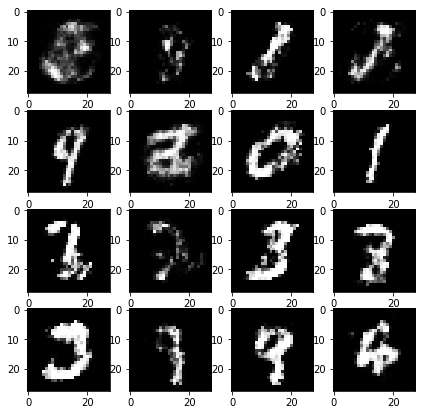

Epoch: 63 | Generator Loss: 1.45734 | Discirminator Loss: 0.96094


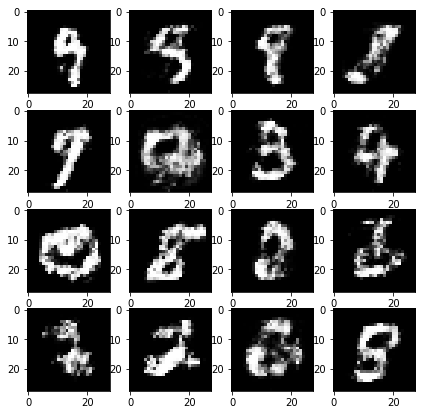

Epoch: 64 | Generator Loss: 1.48499 | Discirminator Loss: 0.95310


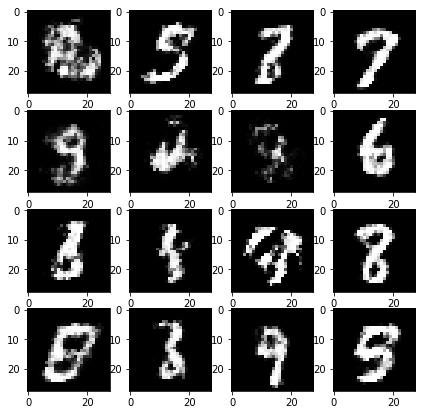

Epoch: 65 | Generator Loss: 1.48528 | Discirminator Loss: 0.95645


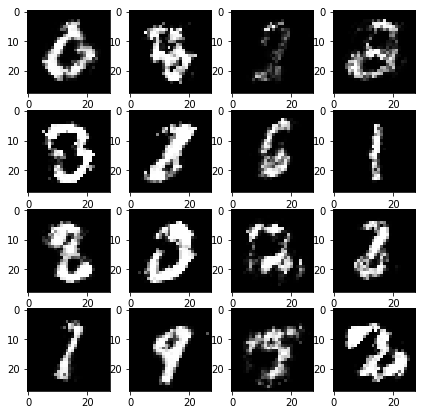

Epoch: 66 | Generator Loss: 1.48033 | Discirminator Loss: 0.95560


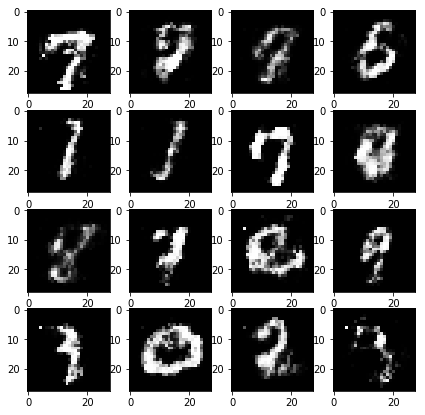

Epoch: 67 | Generator Loss: 1.49229 | Discirminator Loss: 0.94249


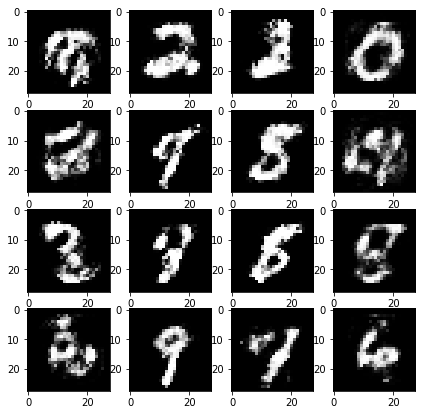

Epoch: 68 | Generator Loss: 1.50872 | Discirminator Loss: 0.93682


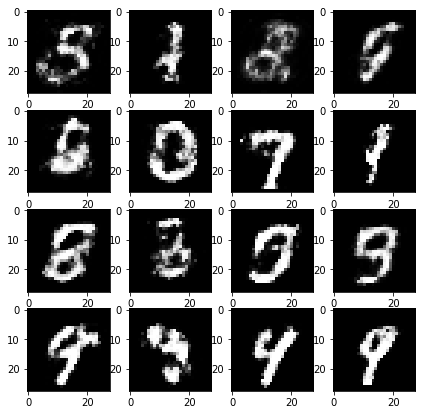

Epoch: 69 | Generator Loss: 1.51746 | Discirminator Loss: 0.92878


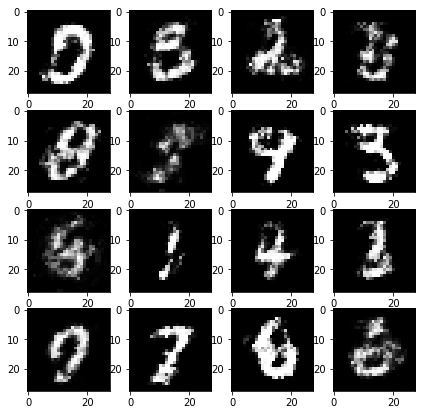

Epoch: 70 | Generator Loss: 1.54578 | Discirminator Loss: 0.91769


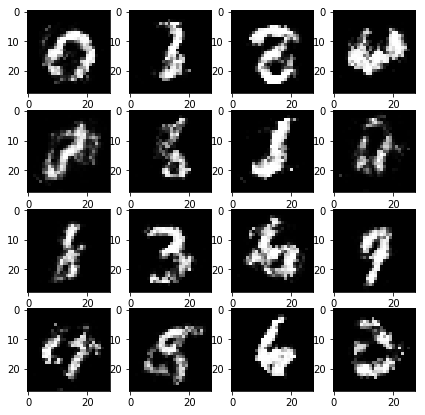

Epoch: 71 | Generator Loss: 1.55910 | Discirminator Loss: 0.91179


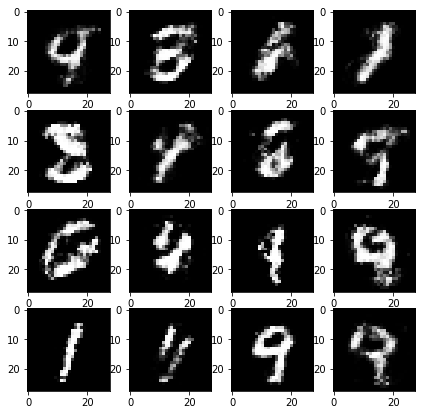

Epoch: 72 | Generator Loss: 1.55349 | Discirminator Loss: 0.91417


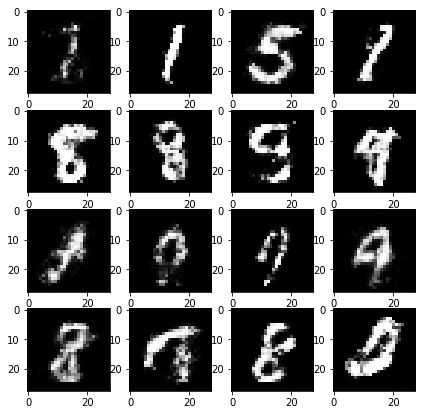

Epoch: 73 | Generator Loss: 1.57673 | Discirminator Loss: 0.90432


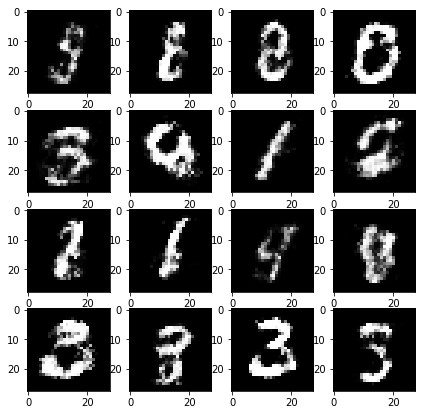

Epoch: 74 | Generator Loss: 1.58151 | Discirminator Loss: 0.90191


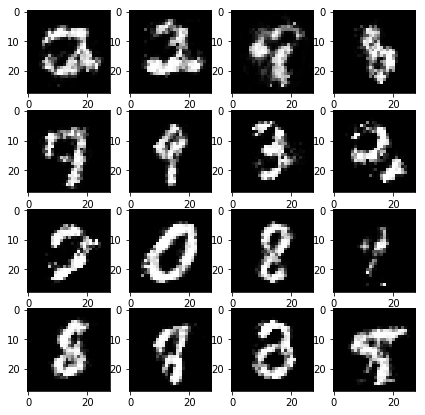

Epoch: 75 | Generator Loss: 1.58672 | Discirminator Loss: 0.89973


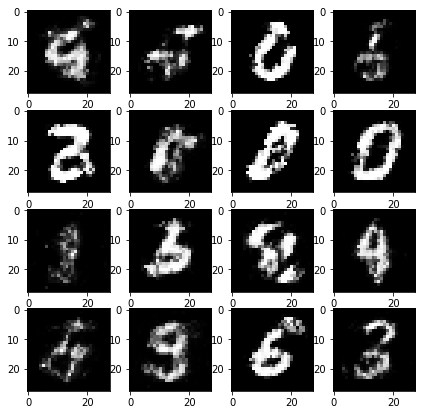

Epoch: 76 | Generator Loss: 1.58458 | Discirminator Loss: 0.90962


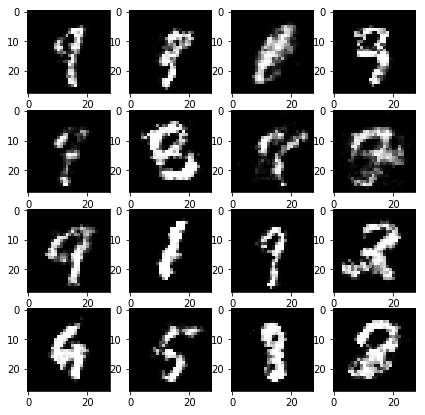

Epoch: 77 | Generator Loss: 1.58033 | Discirminator Loss: 0.90027


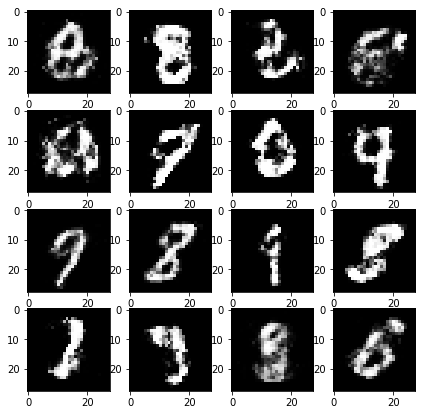

Epoch: 78 | Generator Loss: 1.58662 | Discirminator Loss: 0.90128


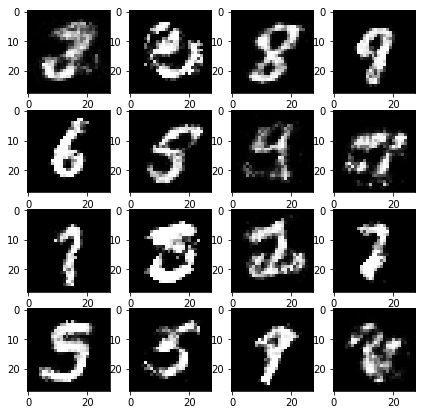

Epoch: 79 | Generator Loss: 1.57842 | Discirminator Loss: 0.90840


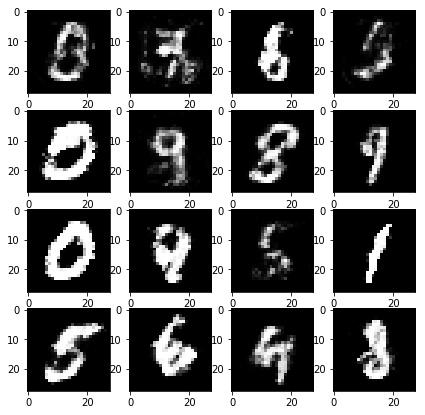

Epoch: 80 | Generator Loss: 1.57786 | Discirminator Loss: 0.90929


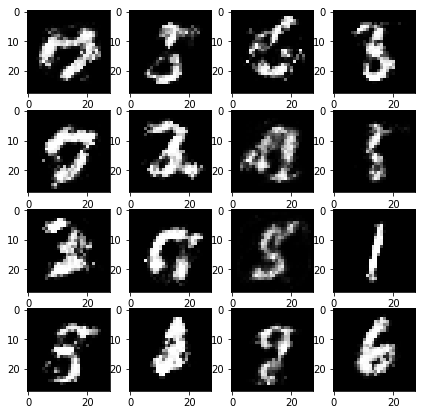

Epoch: 81 | Generator Loss: 1.58951 | Discirminator Loss: 0.90598


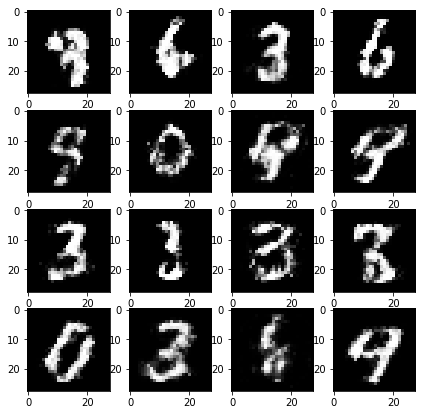

Epoch: 82 | Generator Loss: 1.60899 | Discirminator Loss: 0.89788


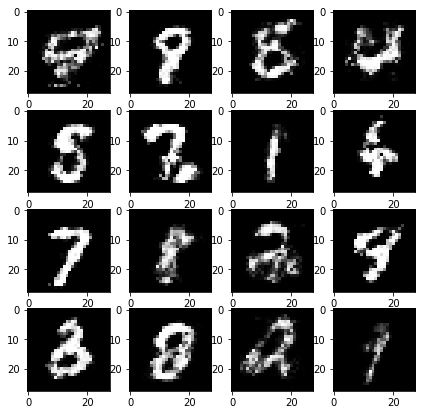

Epoch: 83 | Generator Loss: 1.60509 | Discirminator Loss: 0.90715


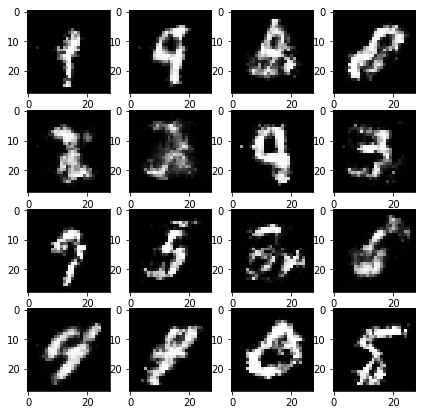

Epoch: 84 | Generator Loss: 1.58720 | Discirminator Loss: 0.91035


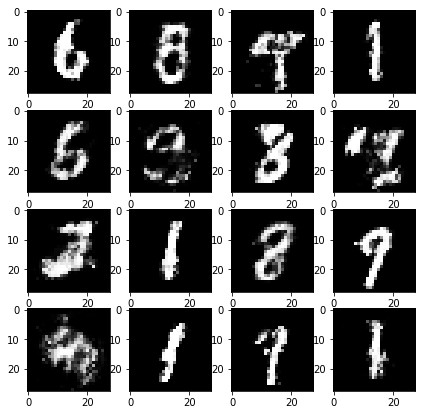

Epoch: 85 | Generator Loss: 1.59619 | Discirminator Loss: 0.90224


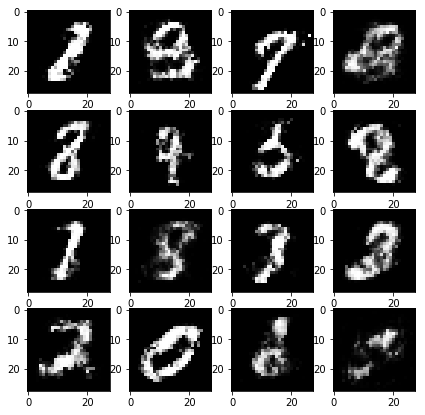

Epoch: 86 | Generator Loss: 1.59920 | Discirminator Loss: 0.90772


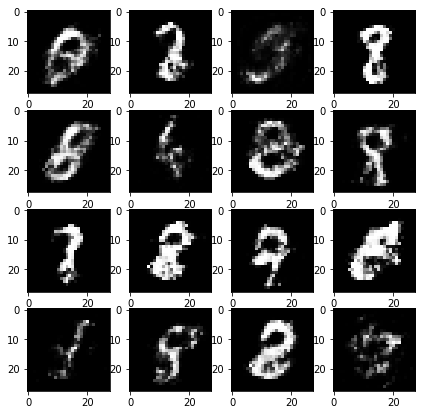

Epoch: 87 | Generator Loss: 1.59478 | Discirminator Loss: 0.90608


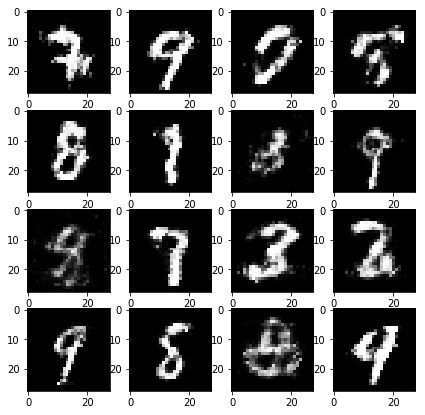

Epoch: 88 | Generator Loss: 1.58661 | Discirminator Loss: 0.90568


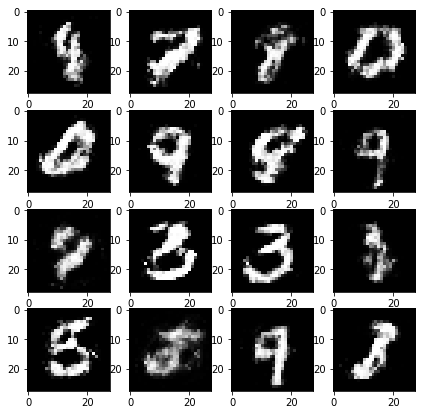

Epoch: 89 | Generator Loss: 1.60682 | Discirminator Loss: 0.90073


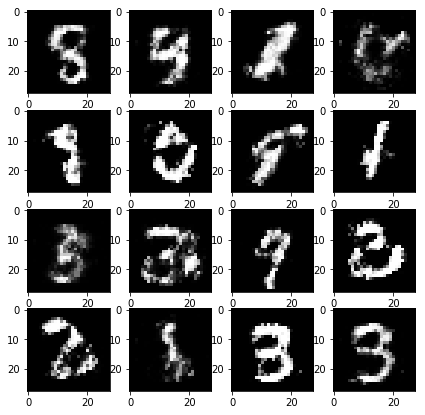

Epoch: 90 | Generator Loss: 1.59272 | Discirminator Loss: 0.90356


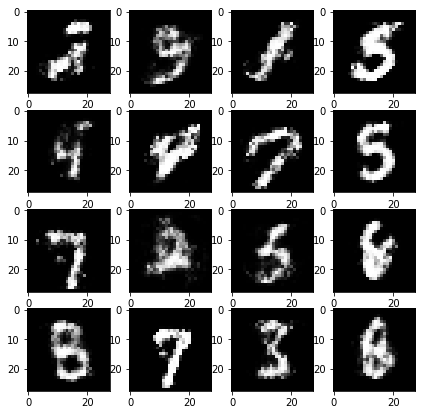

Epoch: 91 | Generator Loss: 1.60203 | Discirminator Loss: 0.87993


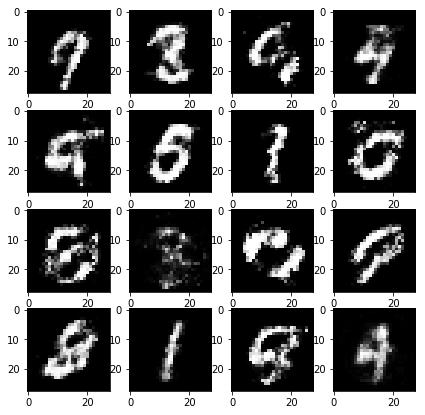

Epoch: 92 | Generator Loss: 1.63161 | Discirminator Loss: 0.87856


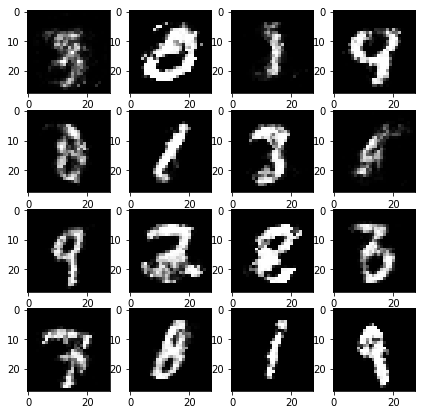

Epoch: 93 | Generator Loss: 1.63339 | Discirminator Loss: 0.87557


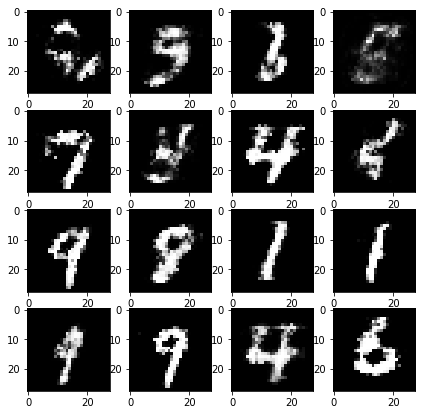

Epoch: 94 | Generator Loss: 1.66152 | Discirminator Loss: 0.86839


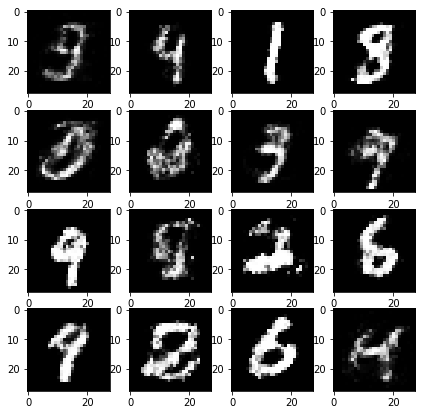

Epoch: 95 | Generator Loss: 1.66592 | Discirminator Loss: 0.86109


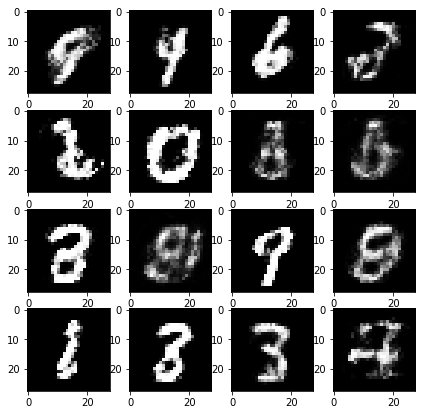

Epoch: 96 | Generator Loss: 1.69024 | Discirminator Loss: 0.85088


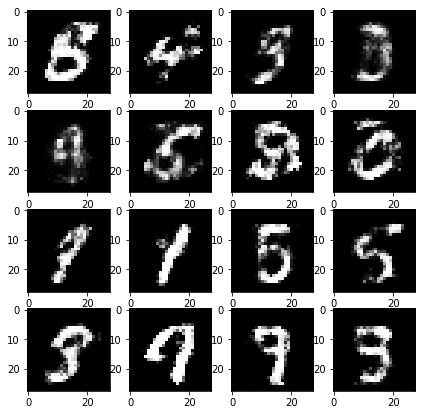

Epoch: 97 | Generator Loss: 1.69260 | Discirminator Loss: 0.85067


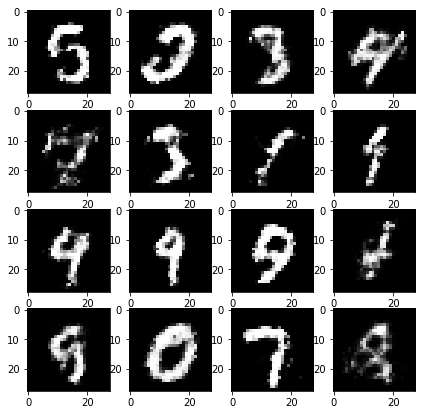

Epoch: 98 | Generator Loss: 1.70896 | Discirminator Loss: 0.85176


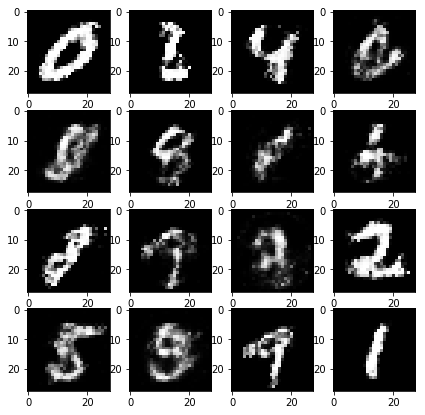

Epoch: 99 | Generator Loss: 1.72797 | Discirminator Loss: 0.85424


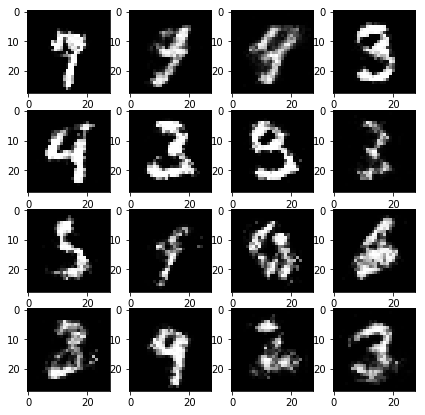

In [10]:
epochs = 100 # a gan usually takes a lot of epochs to work properly
num_batches = 60000/batch_size
learning_rate = 0.001

Glosses = []
Dlosses = []

t = 0
for epoch in range(epochs):
    gcum_loss = 0.0
    dcum_loss = 0.0
    for features in training_data:
        t += 1
        features = features.as_in_context(ctx)
        z = nd.random.normal(0, 1, (features.shape[0], 100)).as_in_context(ctx)
        
        with autograd.record():
            generated = generator(z)
            Gloss = gloss(generated)
        Gloss.backward()
        adam(t, gparams, vs = gvs, sqrs = gsqrs, lr = learning_rate)
        
        with autograd.record():
            Dloss = dloss(generated, features)
        Dloss.backward()
        adam(t, dparams, vs = dvs, sqrs = dsqrs, lr = learning_rate)
        
        gcum_loss += Gloss
        dcum_loss += Dloss
    
    Gloss = gcum_loss.asscalar()/num_batches
    Dloss = dcum_loss.asscalar()/num_batches
    
    Glosses.append(Gloss)
    Dlosses.append(Dloss)
    
    print(f'Epoch: {epoch} | Generator Loss: {Gloss:.5f} | Discirminator Loss: {Dloss:.5f}')
    
    plt.figure(figsize = (7, 7))
    for i, gen in enumerate(generated[:16], 1):
        plt.subplot(4, 4, i)
        plt.imshow(gen.reshape((28, 28)).asnumpy(), cmap = 'gray')
    plt.show()

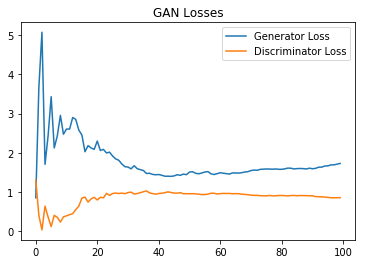

In [11]:
plt.plot(Glosses, label = 'Generator Loss')
plt.plot(Dlosses, label = 'Discriminator Loss')
plt.legend()
plt.title('GAN Losses')
plt.show()

From the graph we can see that around 40th epoch the generator and discriminator were at perfect mini-max equilibrium.